# **EduExcluders: When Data Plays the Role of the Gatekeeper in Schools**

---
This notebook contains experiments for a black mirror scenario where educational institutions screen students based on their background. The data is is first analysed. A classification model is created to carry out this scenrio. We also apply at least two Explainable AI methods which are then evaluated and compared. We then use these results to provide recommendations for the future

The prospective student data is provided from https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

# Exploratory Data analysis

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
base_dir = 'data/'

In [18]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')

  base_dir = '/content/drive/MyDrive/Maastricht University/MSc/Notes/Year 1/Period 4/XAI/XAI-Project/'
except ImportError:
  pass

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
data_file = 'data.csv'

In [3]:
# Read the data
data = pd.read_csv(f'{base_dir}{data_file}',sep=";")

## Getting Aquainted with the dataset

In [50]:
# Get the first 5 entries
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [51]:
# Information about the size of the dataset and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [52]:
# Printining the amount of unique values in each column
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

Now that we have explored each of these, we can say the following about the data we have,

Categorical features include: Marital Status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, International

Numeric: Previous qualification (grade), Admission grade, Age at enrollment, Curricular units 1st/2nd sem (credited),  Curricular units 1st/2nd sem (enrolled), Curricular units 1st/2nd sem (evaluations), Curricular units 1st/2nd sem (approved), Curricular units 1st/2nd sem (grade), Curricular units 1st/2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP

Outcome: Target (categorical)

## Data Imbalance

In [53]:
imbalance_check = data['Target'].value_counts().reset_index()

<ipython-input-54-da263634f0e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data_balance_fig = sns.barplot(x = "index", y = "Target", data = imbalance_check, palette='colorblind')


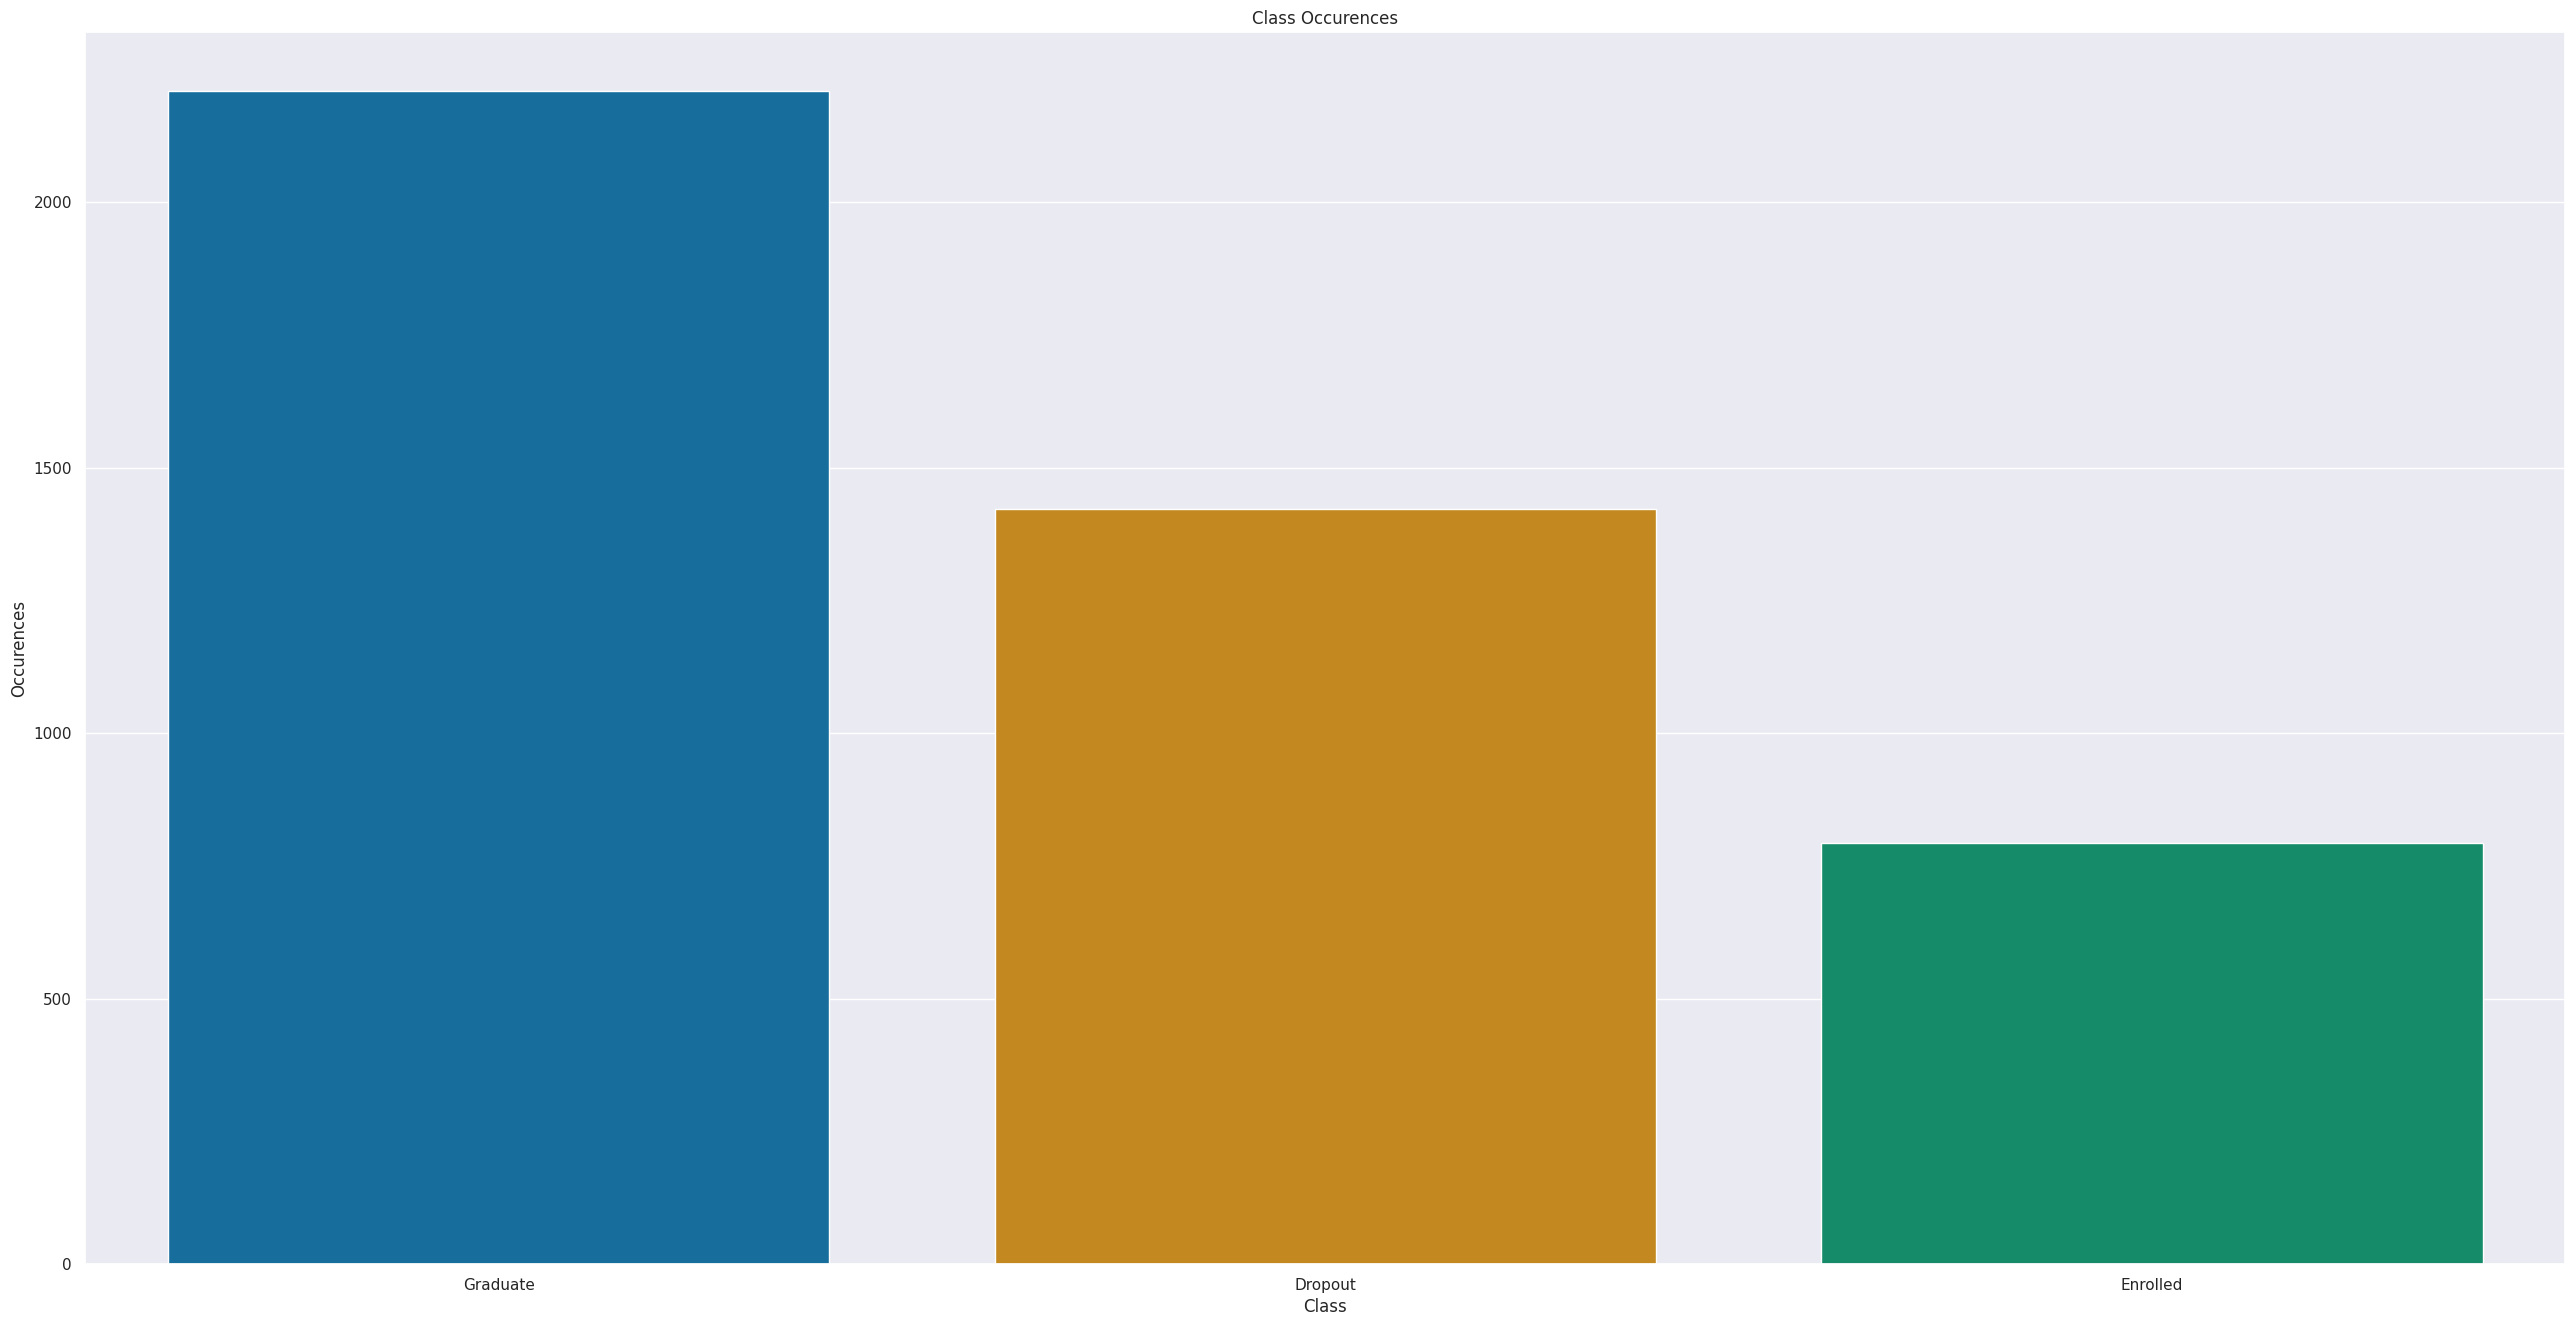

In [54]:
data_balance_fig = sns.barplot(x = "index", y = "Target", data = imbalance_check, palette='colorblind')
plt.ylabel('Occurences')
plt.xlabel('Class')
plt.title("Class Occurences")
plt.show(data_balance_fig)

Looking at the above graph, we can clearly see that we are working with imbalanced data, with Graduated students containing the majority of the dataset.

Although, this imbalance may not necessarily be significant between graduate & dropout (**NOTE**: Provide proof of this).

Addressing the class imbalance may therefore be necessary to ensure model performance and generalization across all classes. This could be done through under and over-sampling techniques such as SMOTE.



## Univariate Analysis

Explore each feature, analyze its distribution and examine summary statistics.

## Bivariate Analysis
Explore the relationship between each feature and the target variable, perform statistical analysis to assess the significance of releationships between categorical variables and the target variable.


## Multivariate Analysis

Examine interactiosn between multiple features, look for correlations between features to identify multicollinearity issues.

### Correlation Matrix Heatmap

In [4]:
correlation_matrix = data.corr()

<ipython-input-4-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


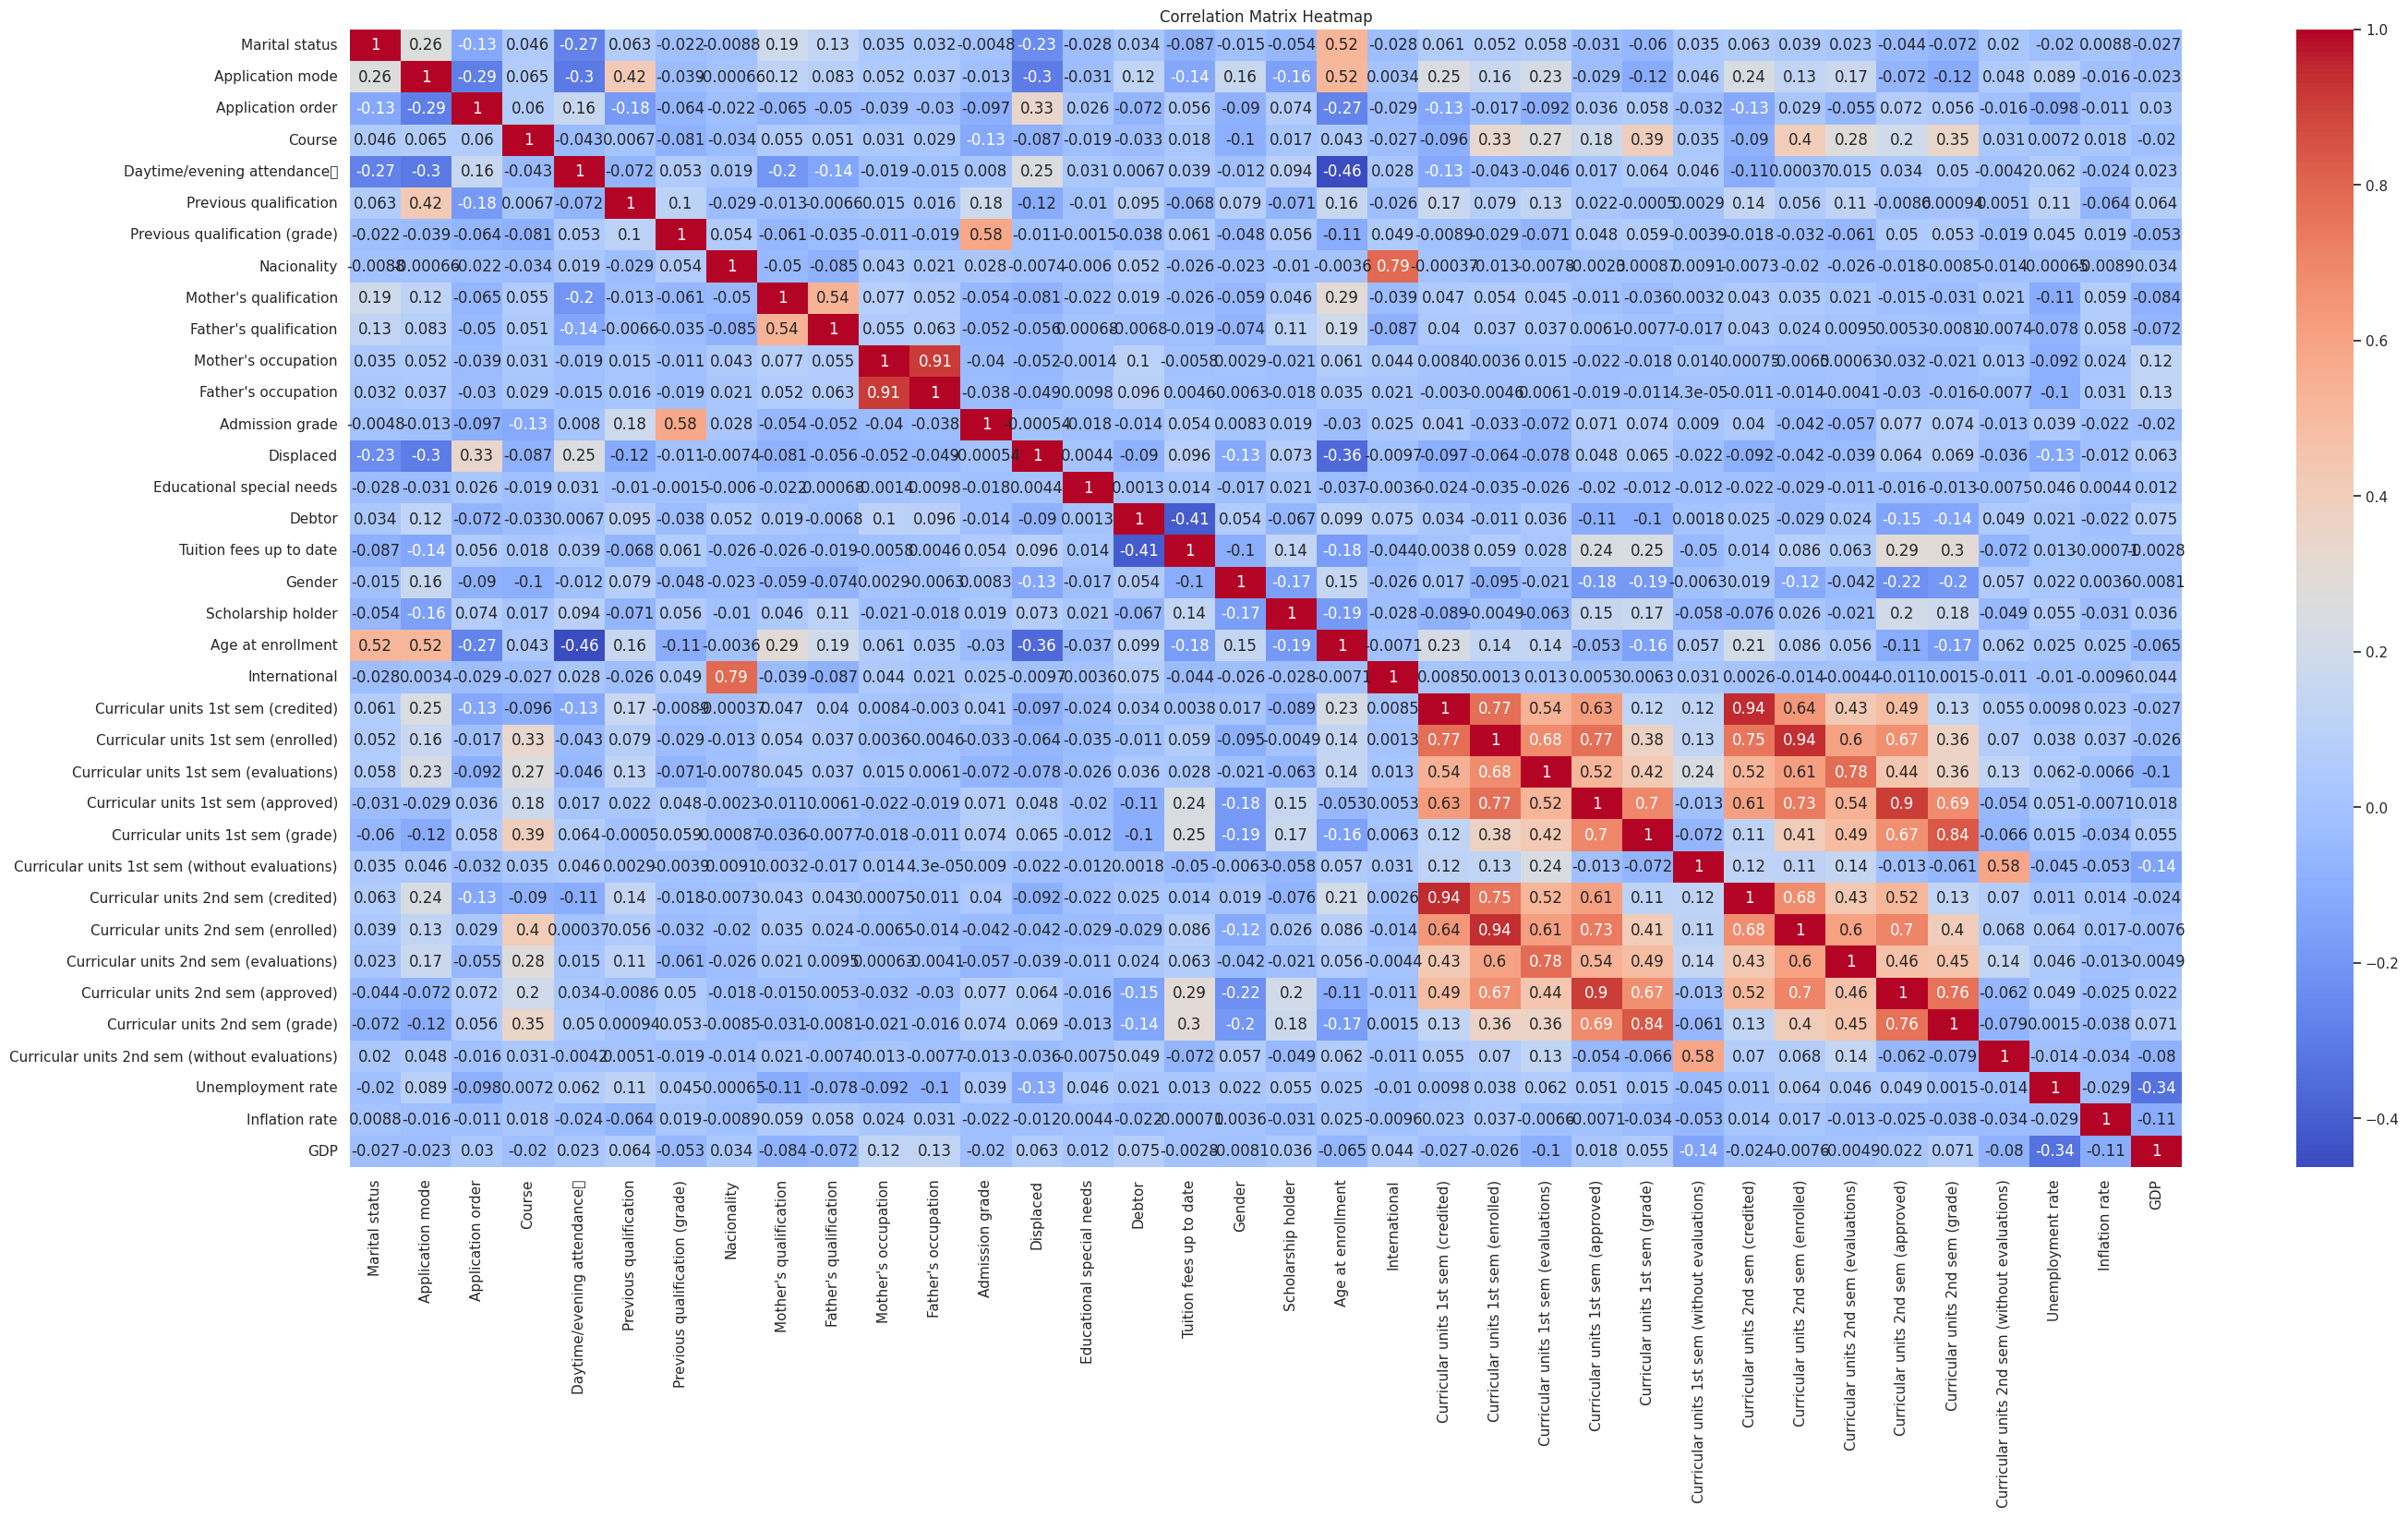

In [5]:
sns.set(rc = {'figure.figsize':(32,16)})
sns.heatmap(correlation_matrix, annot = True, fmt='.2g', cmap= 'coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Correlation

In [10]:
high_corr_threshold = 0.6
high_corr_pairs = (correlation_matrix.abs() > high_corr_threshold) & (correlation_matrix != 1)
high_corr_indices = high_corr_pairs.stack()[high_corr_pairs.stack()].index.tolist()

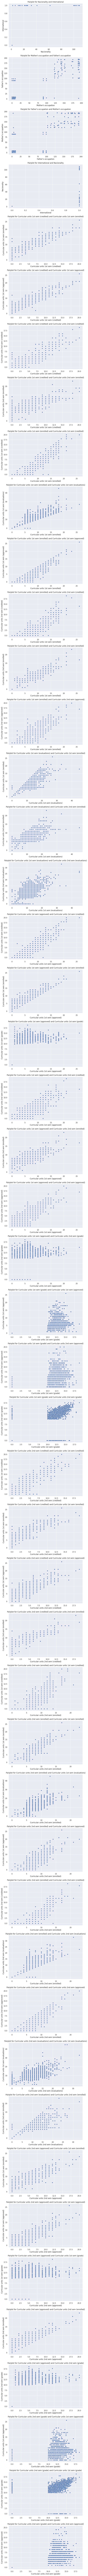

In [13]:
# Create subplots for pair plots of highly correlated features
fig, axes = plt.subplots(nrows=len(high_corr_indices), ncols=1, figsize=(8, 5 * len(high_corr_indices)))

for i, (feature1, feature2) in enumerate(high_corr_indices):
    sns.scatterplot(x=feature1, y=feature2, data=data, ax=axes[i])
    axes[i].set_title(f'Pairplot for {feature1} and {feature2}')

plt.tight_layout()
plt.show()

## Feature Engineering

If applicable, generate new features.

## Dimensionality Reduction
If applicable, reduce the amount of featurese through dimensionality reduction techniques.

# Models

ideas:
- Ensemble Learning Techniques
- kNN
-